<a href="https://colab.research.google.com/github/Mahnazshamissa/Asigmo-Hackathon-/blob/main/Hackathon_common_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humor Detection Task

## Inicialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# NLP libraries
import re #regular expression
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction import text 

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD


In [ ]:
# Import data from the drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls gdrive/MyDrive/Colab_Notebooks/Humor_detection

Hackathon.ipynb  train.csv


In [ ]:
# Load the data
path =  'gdrive/MyDrive/Colab_Notebooks/Humor_detection/train.csv'
df = pd.read_csv(path, sep = ',', encoding="UTF-8")

## Data Overview

In [ ]:
# Data overview
df.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [ ]:
df.describe()

,id,is_humor,humor_rating,humor_controversy,offense_rating
count,8000.00000,8000.000000,4932.000000,4932.000000,8000.000000
mean,4000.50000,0.616500,2.260525,0.499797,0.585325
std,2309.54541,0.486269,0.566974,0.500051,0.979955
min,1.00000,0.000000,0.100000,0.000000,0.000000
25%,2000.75000,0.000000,1.890000,0.000000,0.000000
50%,4000.50000,1.000000,2.280000,0.000000,0.100000
75%,6000.25000,1.000000,2.650000,1.000000,0.700000
max,8000.00000,1.000000,4.000000,1.000000,4.850000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   text               8000 non-null   object 
 2   is_humor           8000 non-null   int64  
 3   humor_rating       4932 non-null   float64
 4   humor_controversy  4932 non-null   float64
 5   offense_rating     8000 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 375.1+ KB


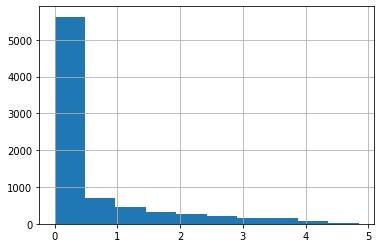

In [ ]:
df.offense_rating.hist()

In [ ]:
# Example text
df.text[1]

'A man inserted an advertisement in the classifieds "Wife Wanted". The next day, he received 1000 of replies, all reading: "You can have mine." Free delivery also available at your door step'

## Cleaning the data general

In [ ]:
def clean_text(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]', ' ', text)
  return text

round1 = lambda x:clean_text(x) # rename my function

In [ ]:
data_clean = df
data_clean.text = pd.DataFrame(df.text.apply(round1))


In [ ]:
data_clean

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,tennessee we re the best state nobody even c...,1,2.42,1.0,0.20
1,2,a man inserted an advertisement in the classif...,1,2.50,1.0,1.10
2,3,how many men does it take to open a can of bee...,1,1.95,0.0,2.40
3,4,told my mom i hit twitter followers she ...,1,2.11,1.0,0.00
4,5,roses are dead love is fake weddings are bas...,1,2.78,0.0,0.10
...,...,...,...,...,...,...
7995,7996,lack of awareness of the pervasiveness of raci...,0,NaN,NaN,0.25
7996,7997,why are aspirins white because they work sorry,1,1.33,0.0,3.85
7997,7998,today we americans celebrate our independence...,1,2.55,0.0,0.00
7998,7999,how to keep the flies off the bride at an ital...,1,1.00,0.0,3.00


# Divide the data into training and testing

In [ ]:
data_train, data_test =  train_test_split(df,test_size = 0.2 ,random_state =12,shuffle =True)

In [ ]:
### doc to vec

In [ ]:
import gensim

In [ ]:
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
data_for_training = list(tagged_document(data_train.text))

In [ ]:
w2vmodel = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=30)

In [ ]:
w2vmodel.build_vocab(data_for_training)

w2vmodel.train(data_for_training, total_examples=w2vmodel.corpus_count, epochs=w2vmodel.epochs)


In [ ]:
X_train = w2vmodel.docvecs.vectors_docs
y_train = data_train.is_humor

In [ ]:

# create logistic regression model
logreg = LogisticRegression()

# train model on  vectorised training data
logreg_model = logreg.fit(X_train, y_train)

In [ ]:
# evaluate model performance on the test set
y_test = data_test.text.apply(w2vmodel.infer_vector)
y_pred = logreg_model.predict(y_test)


ValueError: ignored

In [ ]:
# f1_score(data_test.is_humor, y_pred)
# a = np.ndarray(shape=(1600,50),y_test)

# logreg_model.predict(a)
X_train
a
y_test.array.reshape
# ?a

<PandasArray>
[array([ 2.43788045e-02, -2.95559257e-01, -2.06598997e-01,  5.84254693e-03,
       -2.38226488e-01,  1.72039464e-01,  7.34729841e-02,  7.43363053e-02,
       -1.33974463e-01,  1.93109773e-02,  2.92932302e-01,  4.75876890e-02,
        6.89881667e-02,  4.90019331e-04, -1.42496694e-02, -1.09900646e-01,
        5.15784584e-02, -7.37512559e-02,  1.59674495e-01,  4.87250797e-02,
        1.72595337e-01, -5.42967729e-02,  2.61872679e-01, -2.42652558e-02,
        1.11330055e-01,  1.02928597e-02,  1.32563964e-01,  2.07520574e-02,
        9.28639993e-02, -5.19507825e-02,  2.46600285e-02,  1.41991958e-01,
       -1.44719267e-02,  8.98874775e-02, -2.62636226e-02,  6.15596101e-02,
       -8.00002515e-02, -5.07029181e-05, -6.77526072e-02, -1.16774447e-01,
       -4.52966429e-02,  7.56933466e-02, -3.54575999e-02,  1.20872088e-01,
       -5.26305009e-03,  2.97072642e-02, -8.16198438e-02,  8.04315731e-02,
       -2.34021142e-01, -7.10278302e-02], dtype=float32),
                           

## EDA for task 1

### Find the most common words

In [ ]:
# join the text from all fun and not fun sub sets to define the stop words
xfun = X_train[y_train==1].str.cat()
xnfun = X_train[y_train==0].str.cat()
xbin = pd.DataFrame([[xfun],[xnfun]],columns=['text'])
xbin.text[1]

'sometimes the answers we re looking for had been hiding just below the surface  your love is bright as ever  even in the shadows    beyonce just saw it with stedman  it s phenomenal   layers and layers of it  wakunda foreveeeerrrr  black pantheryou only live once  but if you do it right  once is enough max planck was told by a professor not to go into physics because  almost everything  was  already discovered   planck said he just wanted to learn the basics  and not discover anything new  he went on to develop quantum theory and win a nobel prize  we are more in need of a little bit of manners than we are in need of a lot of knowledge   abdullah ibn mubaraksometimes  even when we find the answer we ve been looking for  we re still left with a whole hell of a lot of questions secretly everyone just wants to be loved by one special person in       dubai man mohamed basheer bought a lottery ticket before boarding an emirates flight  which crashed and exploded  he escaped the crash and w

In [ ]:
# document term matrix
cv = CountVectorizer()
data_cv = cv.fit_transform(xbin.text)
data_dtm = pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())

NameError: ignored

In [ ]:
data_dtm = data_dtm.transpose()

In [ ]:
# extract the most commoon 35 words
top_dict = {}
top_dict_values = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(45)
    top_dict[c] = list(top.index) 
    top_dict_values[c]= list(zip(top.index, top.values))


NameError: ignored

In [ ]:
top_dict_values

{0: [('the', 2957),
  ('to', 1867),
  ('you', 1657),
  ('my', 1258),
  ('and', 1258),
  ('it', 1080),
  ('of', 1047),
  ('in', 1019),
  ('me', 1001),
  ('is', 827),
  ('what', 786),
  ('do', 674),
  ('that', 661),
  ('on', 582),
  ('was', 524),
  ('for', 523),
  ('with', 495),
  ('have', 478),
  ('he', 475),
  ('they', 459),
  ('she', 431),
  ('when', 425),
  ('are', 390),
  ('wife', 386),
  ('your', 379),
  ('like', 374),
  ('her', 374),
  ('at', 374),
  ('but', 350),
  ('just', 349),
  ('so', 338),
  ('if', 333),
  ('be', 327),
  ('can', 317),
  ('out', 308)],
 1: [('the', 1941),
  ('to', 1583),
  ('you', 1218),
  ('and', 1217),
  ('of', 984),
  ('in', 829),
  ('is', 697),
  ('it', 694),
  ('for', 525),
  ('that', 518),
  ('we', 445),
  ('are', 407),
  ('your', 395),
  ('be', 379),
  ('can', 370),
  ('with', 329),
  ('on', 323),
  ('have', 301),
  ('what', 255),
  ('was', 244),
  ('this', 236),
  ('not', 224),
  ('they', 221),
  ('as', 216),
  ('when', 216),
  ('all', 213),
  ('but',

In [ ]:
# define my own stop words as the 20 most frequent words in both subsets
stop_words = frozenset(set(top_dict[0]).intersection(top_dict[1]))
stop_words

frozenset({'and',
           'are',
           'be',
           'but',
           'can',
           'for',
           'have',
           'he',
           'in',
           'is',
           'it',
           'just',
           'my',
           'of',
           'on',
           'so',
           'that',
           'the',
           'they',
           'to',
           'was',
           'what',
           'when',
           'with',
           'you',
           'your'})

### exclude the stop words from the data set

In [ ]:
cv = TfidfVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(X_train)
data_dtm_train = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# data_dtm.index = data_clean.index
data_dtm_train

,aa,aaa,aaaa,aaaaafddasfrwe,aap,ab,abacus,abandoned,abba,abbey,abc,abducted,abducting,abdul,abdullah,aberdeen,ability,able,abnormal,aboard,abolished,abort,abortion,abortions,about,abouttit,above,abra,abraham,abrams,abroad,abruptly,abs,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,...,youth,youthful,youtube,youuu,yr,yrs,yth,yu,yuck,yum,yung,yup,zayda,zayn,zeal,zealand,zebra,zer,zero,zeroes,zeus,zimmer,zinc,zip,ziploc,zipper,zippo,zippy,zombie,zombies,zombified,zone,zones,zoo,zookeeper,zookeepers,zoos,zuckerberg,zumba,zuniga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

In [ ]:
# vectorizer = TfidfVectorizer(stop_words=stop_words, 
# max_features= 5000, # keep top 5000 terms 
# # max_df = 0.5, 
# # smooth_idf=True
# )

# Xm = vectorizer.fit_transform(X_train)

In [ ]:
# singular value decomposition
svd_model = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(data_dtm_trainp)
len(svd_model.components_)

4

In [ ]:
terms = cv.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
me
do
we
she
her
don
like
if
people
wife
not
how
at
re
about
 
Topic 1: 
do
call
people
we
black
an
who
how
why
gay
their
get
mexican
muslim
white
 
Topic 2: 
we
our
people
re
all
us
black
don
there
never
like
this
ve
more
as
 
Topic 3: 
me
don
like
at
no
people
am
doctor
dad
oh
god
one
good
him
interviewer
 


#### Fun sentences

In [ ]:
seq = y_train==1
svd_model.fit(data_dtm_train.iloc[seq.values])
len(svd_model.components_)

4

In [ ]:
terms = cv.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
me
do
she
wife
her
said
like
at
why
if
 
Topic 1: 
do
call
an
why
people
gay
black
how
mexican
who
 
Topic 2: 
she
her
call
do
wife
said
girlfriend
asked
me
told
 
Topic 3: 
me
call
no
do
doctor
dad
oh
ok
interviewer
therapist
 


#### Not funy text

In [ ]:
seq = y_train==0
svd_model.fit(data_dtm_train.iloc[seq.values])
len(svd_model.components_)

4

In [ ]:
terms = cv.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
we
not
re
love
don
this
people
all
life
our
 
Topic 1: 
we
our
black
us
ourselves
trans
folx
mental
community
minds
 
Topic 2: 
auntie
tea
red
tweet
we
welcome
tonight
relationship
how
do
 
Topic 3: 
love
re
not
we
if
don
her
sometimes
know
life
 


### Train a model

In [ ]:
# Transform the test set
data_cv = cv.fit_transform(X_test)
data_dtm_test = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm_test

X_dtm_train, X_dtm_test, y_train, y_test =  train_test_split(X, Y,test_size = 0.2 ,random_state =12,shuffle =True)

,aaaa,aap,abandoned,abandoning,abbreviation,abdominal,abercrombie,ability,able,abnormal,about,above,abraham,absolutely,absorption,absurdity,abusive,abuzz,abysmal,academic,accent,accept,acceptable,accepted,accepting,access,accident,accidentally,according,account,accountant,accumulate,accurate,accused,ackles,acknowledge,acknowledged,aclu,acne,acquiring,...,yay,yeah,year,yearly,yearold,years,yearsbebe,yell,yelled,yelling,yellow,yells,yeon,yep,yes,yesterday,yet,yiqian,yo,yoda,yoga,yoghurt,york,yoro,youd,youll,young,younger,youre,yours,yourself,youth,youtube,youve,yr,yrs,yu,yutopia,zero,zombies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# NB does not work because we have more features than samples.

gnb = GaussianNB()
y_pred = gnb.fit(data_dtm_train, y_train).predict(data_dtm_test)
# print("Number of mislabeled points ratio is:",(y_test != y_pred).sum()/X_test.shape[0])

ValueError: ignored

## Finding the most frequent words 

In [ ]:
allTextHumor = data_clean["text"].where(data_clean.is_humor==1).tolist() 
allTextNotHumor = data_clean["text"].where(data_clean.is_humor==0).tolist()

sent_str = ""
for i in allTextHumor:
    sent_str += str(i) + "-"
sent_str = sent_str[:-1]
allTextHumorCombined = sent_str
print(allTextHumorCombined)

#def combine_text(list_of_text):
#    '''Takes a list of text and combines them into one large chunk of text.'''
#    combined_text = ' '.join(list_of_text)
#    return combined_text
#combine_text(allTextHumor)

tennessee were the best state nobody even comes close elevennessee walks into the room tennessee oh shit-a man inserted an advertisement in the classifieds wife wanted the next day he received  of replies all reading you can have mine free delivery also available at your door step-how many men does it take to open a can of beer none it should be open by the time she brings it to the couch-told my mom i hit  twitter followers she pointed out how my brother owns a house and im wanted by several collection agencies oh ma-roses are dead love is fake weddings are basically funerals with cake-nan-nan-me im such an original truly one of a kind also me holding a glass of white wine i love to laugh-nan-nan-nan-whats the difference between a mormon man and a muslim man a mormon man gets  virgins and then kills himself-stop calling  because youve run out of toilet paper yes if youre running out of toilet paper dont dial  the number for that is  stephen colbert-when you march the streets shouting 

In [ ]:
# combine it!
data_combined = {key:[combine_text(value)] for (key,value) in data.items()}


NameError: ignored

In [ ]:
 # Iris

In [ ]:
pd.crosstab(df['is_humor'], df['humor_controversy'])

humor_controversy,0.0,1.0
is_humor,,
1,2467,2465


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

LookupError: ignored

In [ ]:
ls


sample_data/
